# Support Vector Machines (SVM)

### Question 1:  
### Max Margin Classifier in 1D
**Let's assume two classes in 1D dimension. Class 1 : 9,10,11,12,13,14; Class -1 : -9,-10,-11,-12,-13,-14<br> <br>a) Plot these points. <br><br>b) Are they linearly separable?<br><br>c) Assume a threshold t. Points to one side of the threshold belong to class -1 and points to the other side of the threshold belong to class 1. Find the range of values of t which classifies the two classes completely. <br><br>d) Let's say y_i is the label and can take values -1 or 1. Max margin classifiers aims to find a supporting hyperplane (a boundary between the two classes) such the distance (or margin) from points belonging to either class is maximised. The points closest to the boundary on either side are termed as support vectors. Maximising the perpendicular distance from the support vectors to line will achieve the goal of max margin classifier. Our objective/cost function for the 1D case is cost = max{min(y_i(t-x_i))} where t is the threhold, y_i is the label and x_i is the data point. Plot the cost as a function of the threshold for the range of values of t found in the (c) part. <br><br>e) For what t is the cost maximum? This is the threshold that optimally classifies the two datasets. Now plot the threshold, and the two classes on a graph. Assign appropriate colours to distinguish the two classes and the threshold.<br><br>f) What are the support vectors?<br><br>g) Comment on the threshold. Is it the mid point of the two support vectors in this linearly separable 1D case?**

b) Yes these are linearly seperable points
c)Range of values of T => max(class-1) and min(class1)
-9<T<9
f)The support vectors are -9 and 9
g) Yes the threshold is actually the mid point of the two support vectors.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

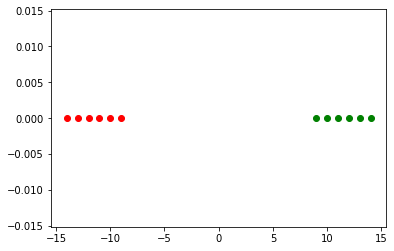

In [2]:
# Code here
class1=[9,10,11,12,13,14]
class2=[-9,-10,-11,-12,-13,-14]
plt.scatter(class1,np.zeros(6),color='green')
plt.scatter(class2,np.zeros(6),color='red')
plt.show()

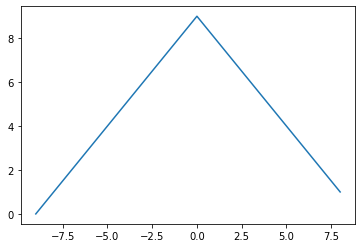

In [3]:
#part D
def cost_function(t):
    dist_1 = min(abs(class1-t))
    dist_2 = min(abs(class2-t))
    return min(dist_1,dist_2)

T = np.arange(-9,9)
cost_t=[cost_function(t) for t in T]
plt.plot(T,cost_t)
plt.show()

In [4]:
threshold = T[np.argmax(cost_t)]


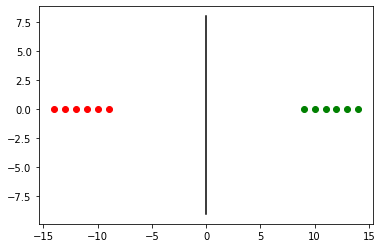

In [5]:
plt.scatter(class1,np.zeros(6),color='green')
plt.scatter(class2,np.zeros(6),color='red')
plt.plot(threshold*np.ones(18),np.arange(-9,9),color="black")
plt.show()

Write your final answer here.

### Question 2
### Outliers and Slack Parameter
**a) Class 1 : -6,9,10,11,12,13,14; Class -1 : -9,-10,-11,-12,-13,-14 Repeat all parts of Q1. Does the boundary shift? Is this more optimal than the classifier in Q1? You will see that there is an outlier. Will it be better to ignore the outlier so that the classifier generalizes better? <br><br> b) Class 1 : -10,9,10,11,12,13,14; Class -1 : -9,-10,-11,-12,-13,-14. Is this data linearly separable? Is there an outlier? Ignore the outlier and then report the threhold.<br><br>c) In the above cases, we allow for some error so that our data generalises better. How much of this error is permissible is captured by a slack parameter.** 

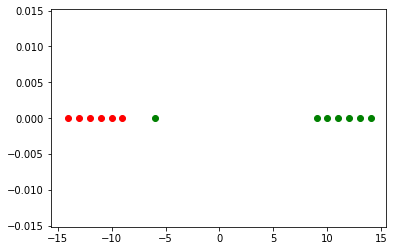

In [6]:
# Code here
class1=[-6,9,10,11,12,13,14]
class2=[-9,-10,-11,-12,-13,-14]
plt.scatter(class1,np.zeros(7),color='green')
plt.scatter(class2,np.zeros(6),color='red')
plt.show()

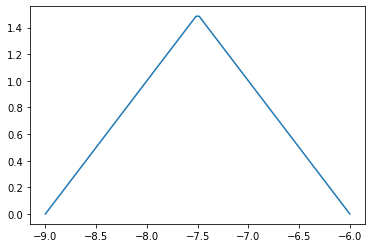

In [7]:
T = np.linspace(-9,-6,100)
cost_t=[cost_function(t) for t in T]
plt.plot(T,cost_t)
plt.show()

threshold = T[np.argmax(cost_t)]

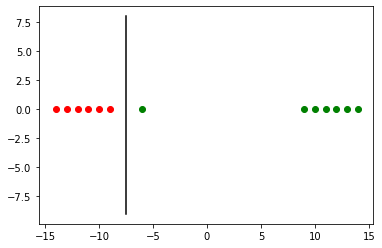

In [8]:
plt.scatter(class1,np.zeros(7),color='green')
plt.scatter(class2,np.zeros(6),color='red')
plt.plot(threshold*np.ones(18),np.arange(-9,9),color="black")
plt.show()

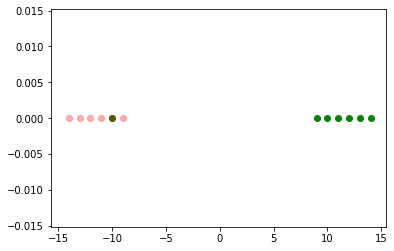

In [9]:
class1_orig=[-10,9,10,11,12,13,14]
class1=class1_orig.copy()
class2=[-9,-10,-11,-12,-13,-14]
plt.scatter(class1,np.zeros(7),color='green')
plt.scatter(class2,np.zeros(6),color='red',alpha=0.3)
plt.show()


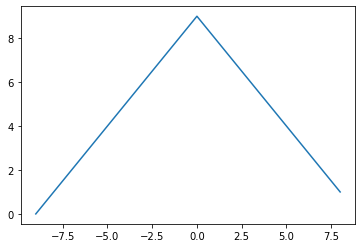

In [10]:
#Ignoring outlier
T = np.arange(-9,9)
class1.remove(-10)
cost_t=[cost_function(t) for t in T]
plt.plot(T,cost_t)
plt.show()
threshold = T[np.argmax(cost_t)]

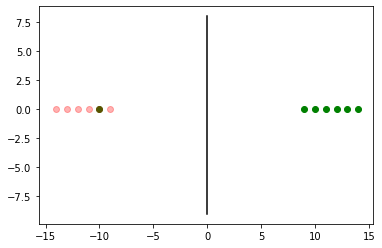

In [11]:
plt.scatter(class1_orig,np.zeros(7),color='green')
plt.scatter(class2,np.zeros(6),color='red',alpha=0.3)
plt.plot(threshold*np.ones(18),np.arange(-9,9),color="black")
plt.show()

Write your final answer here.

### Question 3 : 
### SVM in 2D
**Using sklearn, visualise the data points and plot the decision boundary for the following 2D datapoints, into 2 classes. Also mention the support vectors for each case. Use sklearn's SVC implementation with 'linear' kernel and default C. <br> <br>
(a)  Class 1 - (-1,-2), (1,1), (1.5, 1.5), (-2,-1), (0,0), (1,-0.5) <br> Class 2 - (4.1,5.2), (6,8), (4,4), (7,8), (4.5,6), (5.5,6)**


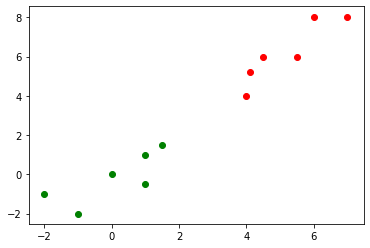

In [12]:
# Code here
class1=np.array([[-1,1,1.5,-2,0,1],[-2,1,1.5,-1,0,-0.5]])
class2=np.array([[4.1,6,4,7,4.5,5.5],[5.2,8,4,8,6,6]])
X = np.array([[-1,1,1.5,-2,0,1,4.1,6,4,7,4.5,5.5],[-2,1,1.5,-1,0,-0.5,5.2,8,4,8,6,6]]).T
Y = np.array([0,0,0,0,0,0,1,1,1,1,1,1])
plt.scatter(class1[0,:],class1[1,:],color='green')
plt.scatter(class2[0,:],class2[1,:],color='red')
plt.show()

In [13]:
from sklearn.svm import SVR,SVC
model = SVC(kernel="linear").fit(X,Y)

In [14]:
model.support_vectors_

array([[1.5, 1.5],
       [4. , 4. ]])

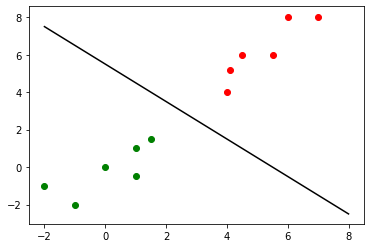

In [15]:
c = model.intercept_.item()
w=model.coef_[0]

x_plot = np.linspace(-2,8,50)
y_plot =  (-w[0]/w[1])*x_plot - c/w[1] 
plt.scatter(class1[0,:],class1[1,:],color='green')
plt.scatter(class2[0,:],class2[1,:],color='red')
plt.plot(x_plot,y_plot,color="black")
plt.show()

**(b) Now add the point (3.4,2.3) to Class 0 from part (a), and classify into Class0 and Class1 again.**

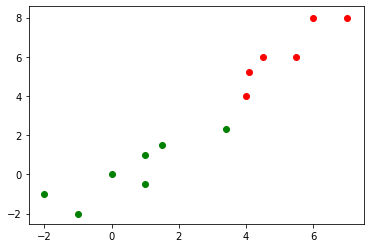

array([[3.4, 2.3],
       [4. , 4. ]])

In [16]:
# Code here
class1=np.array([[-1,1,1.5,-2,0,1,3.4],[-2,1,1.5,-1,0,-0.5,2.3]])
class2=np.array([[4.1,6,4,7,4.5,5.5],[5.2,8,4,8,6,6]])
X_new = np.vstack((X,np.array([3.4,2.3])))
Y_new = np.hstack((Y,0))
plt.scatter(class1[0,:],class1[1,:],color='green')
plt.scatter(class2[0,:],class2[1,:],color='red')
plt.show()

model = SVC(kernel="linear").fit(X_new,Y_new)
model.support_vectors_

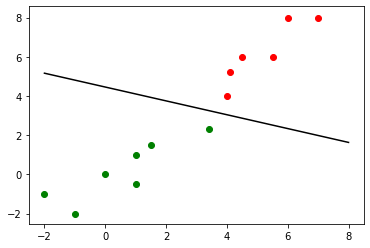

In [17]:
c = model.intercept_.item()
w=model.coef_[0]

x_plot = np.linspace(-2,8,50)
y_plot =  (-w[0]/w[1])*x_plot - c/w[1] 
plt.scatter(class1[0,:],class1[1,:],color='green')
plt.scatter(class2[0,:],class2[1,:],color='red')
plt.plot(x_plot,y_plot,color="black")
plt.show()

**c) Now add the point (4.5,4.5) to Class0 in part (a) and classify into classes 0 and 1 again. <br>  Comment on whether it is possible to perfectly classify these points using a linear classifier in 2D.**

No, its not possible to perfectly classify these points using a linear classifier

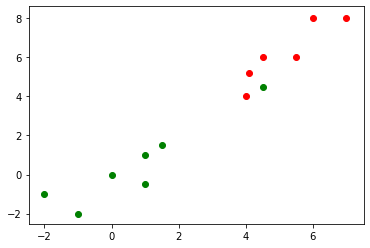

array([[1.5, 1.5],
       [4.5, 4.5],
       [4.1, 5.2],
       [4. , 4. ]])

In [18]:
# Code here
class1=np.array([[-1,1,1.5,-2,0,1,4.5],[-2,1,1.5,-1,0,-0.5,4.5]])
class2=np.array([[4.1,6,4,7,4.5,5.5],[5.2,8,4,8,6,6]])
X_new = np.vstack((X,np.array([4.5,4.5])))
Y_new = np.hstack((Y,0))
plt.scatter(class1[0,:],class1[1,:],color='green')
plt.scatter(class2[0,:],class2[1,:],color='red')
plt.show()

model = SVC(kernel="linear").fit(X_new,Y_new)
model.support_vectors_

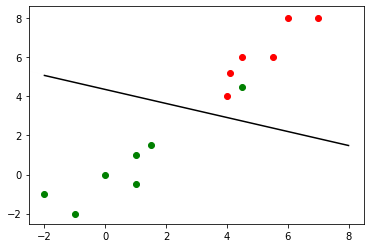

In [19]:
c = model.intercept_.item()
w=model.coef_[0]

x_plot = np.linspace(-2,8,50)
y_plot =  (-w[0]/w[1])*x_plot - c/w[1] 
plt.scatter(class1[0,:],class1[1,:],color='green')
plt.scatter(class2[0,:],class2[1,:],color='red')
plt.plot(x_plot,y_plot,color="black")
plt.show()

### Change of support vectors
**(d) How did the addition of one point in (b) and (c) affect the separating plane in (a)?**

Addition of one point in b and c changed the support vectors. This change brought about change in decision boundary also. It got shifted towards the new point as the new point became the support vector

**(e) Now add the point (-1.3,-1.9) to part (a) and classify again. This time, did the decision boundary change?**


No it didnt change as the support vectors didnt change

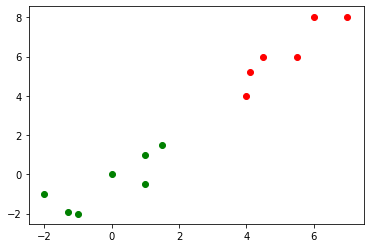

array([[1.5, 1.5],
       [4. , 4. ]])

In [20]:
# Code here
class1=np.array([[-1,1,1.5,-2,0,1,-1.3],[-2,1,1.5,-1,0,-0.5,-1.9]])
class2=np.array([[4.1,6,4,7,4.5,5.5],[5.2,8,4,8,6,6]])
X_new = np.vstack((X,np.array([-1.3,-1.9])))
Y_new = np.hstack((Y,0))
plt.scatter(class1[0,:],class1[1,:],color='green')
plt.scatter(class2[0,:],class2[1,:],color='red')
plt.show()

model = SVC(kernel="linear").fit(X_new,Y_new)
model.support_vectors_

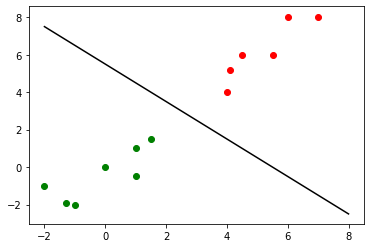

In [21]:
c = model.intercept_.item()
w=model.coef_[0]

x_plot = np.linspace(-2,8,50)
y_plot =  (-w[0]/w[1])*x_plot - c/w[1] 
plt.scatter(class1[0,:],class1[1,:],color='green')
plt.scatter(class2[0,:],class2[1,:],color='red')
plt.plot(x_plot,y_plot,color="black")
plt.show()

### Perturbation of non-support vectors
**(f) Now perturb all the points in both classes in part (a) except (1.5,1.5) in class0 and (4,4) in class1 as follows. Add -0.5 to each x and y coordinate in Class0 and 0.5 to each point in Class1. Did the decision boundary change?**

In [22]:
X[[2,8],:]

array([[1.5, 1.5],
       [4. , 4. ]])

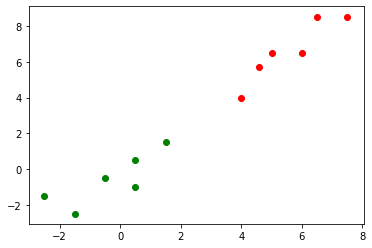

array([[1.5, 1.5],
       [4. , 4. ]])

In [23]:
# Code here
X_new = X.copy()
X_new[:6,:] = X[:6,:] + [-0.5,-0.5]
X_new[6::,:] = X[6::,:] + [0.5,0.5]
#No change in (1.5,1.5),(4.4)
X_new[2,:] = X_new[2,:]+[0.5,0.5]
X_new[8,:] = X_new[8,:]-[0.5,0.5]

Y_new = Y
class1 = X_new[:6,:].T
class2 = X_new[6::,:].T

plt.scatter(class1[0,:],class1[1,:],color='green')
plt.scatter(class2[0,:],class2[1,:],color='red')
plt.show()

model = SVC(kernel="linear").fit(X_new,Y_new)
model.support_vectors_

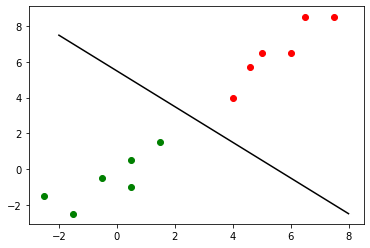

In [24]:
c = model.intercept_.item()
w=model.coef_[0]

x_plot = np.linspace(-2,8,50)
y_plot =  (-w[0]/w[1])*x_plot - c/w[1] 
plt.scatter(class1[0,:],class1[1,:],color='green')
plt.scatter(class2[0,:],class2[1,:],color='red')
plt.plot(x_plot,y_plot,color="black")
plt.show()

**(g) How did the perturbation of points which are not support vectors in (a) affect the final classifier? Did the decision boundary change? Why not?**

It didnt have any effect on the decision boundary, because the support vectors remain unaffected. Non support vectors had no impact on the decision boundary

### Question 4  
### Introduction of Kernels
**a) Plot two concentric circles of radii 4 and 8 with origin at 0. Sample 100 points uniformly from each of these circles. (use rcos(theta) and rsin(theta) to find the coordinates of the points lying on the circle. r is the radius of the circle. Vary theta from 3.6 degrees to 360 degrees in intervals of 3.6 degrees.)<br><br>b) Is the data linearly separable? <br><br>c)Since it's not, we will transform them to a different space (with probably different number of dimensions). The transformation (which generally boils down to inner product - something that we call a kernel) will make the data linearly separable in the different space. For each point, compute features as [1, x, x^2,xy,y^2,y]. This transforms the data from 2D to 6D. Now, use sklearn's SVM classifier (linear kernel) to classify the transformed feature space into two classes. <br><br>d)Now apply SVM classifier with i) polynomial kernel with degree 2  ii) rbf kernel and perform the classification. Visualize the decision boundary in the original 2D space in both the cases. Report the accuracies. Which performs best and why?<br>**

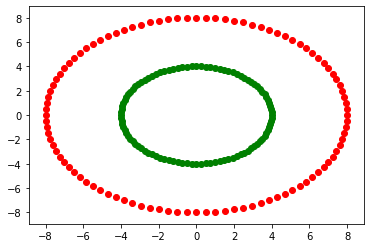

In [25]:
#PartA
radii_1 = 4
radii_2 = 8
theta = np.radians(np.arange(3.6,370,step = 3.6))[:100]
X1=np.vstack((radii_1*np.cos(theta),radii_1*np.sin(theta)))
X2=np.vstack((radii_2*np.cos(theta),radii_2*np.sin(theta)))

plt.scatter(X1[0,:],X1[1,:],color='green')
plt.scatter(X2[0,:],X2[1,:],color='red')
plt.show()
X = np.hstack((X1,X2)).T
Y = np.hstack((-1*np.ones(len(theta)),np.ones(len(theta)))).T


In [26]:
X_feat_trans = np.vstack((np.ones(2*len(theta)),X[:,0],X[:,0]**2,X[:,0]*X[:,1],X[:,1]**2,X[:,1])).T
print(np.shape(X_feat_trans))
#linear SVM
model = SVC(kernel="linear").fit(X_feat_trans,Y)
print(model.coef_[0])
print(model.intercept_.item())

(200, 6)
[ 1.08420217e-19  1.19711603e-05  4.16676402e-02 -5.86301946e-06
  4.16686271e-02 -2.58827740e-05]
-1.666747552786465


In [27]:
def plot_decision_boundary(model,limits,N):
    (x1,x2,y1,y2)=limits
    x = np.linspace(x1,x2,100)
    y = np.linspace(y1,y2,100)
    x_plot, y_plot = np.meshgrid(x, y)
    X_plot = np.vstack((x_plot.flatten(),y_plot.flatten())).T
    Y_plot = model.predict(X_plot)

    #Plotting
    plt.scatter(X_plot[(Y_plot>0),0], X_plot[(Y_plot>0),1], s=30, color='limegreen', marker="o", label='Positive')
    plt.scatter(X_plot[(Y_plot<0),0], X_plot[(Y_plot<0),1], s=30, color='lightcoral', marker="o", label='Negetive')
    plt.scatter(X[(Y>0),0], X[(Y>0),1], s=10, c='g', marker="*", label='Positive_points')
    plt.scatter(X[(Y<0),0], X[(Y<0),1], s=10, c='r', marker="v", label='Negetive_points')

    leg = plt.legend()
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')

    plt.show()

/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


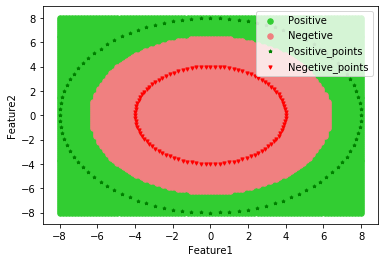

In [28]:
#Polynomial kernel degree = 2
model = SVC(kernel="poly",degree = 2).fit(X,Y)
plot_decision_boundary(model,[-8,8,-8,8],100)

/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


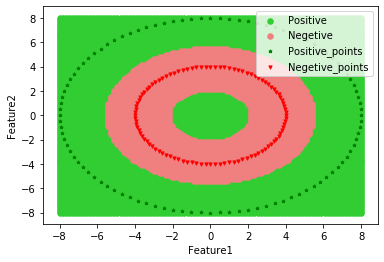

In [29]:
#Gaussian kernel
model = SVC(kernel="rbf").fit(X,Y)
plot_decision_boundary(model,[-8,8,-8,8],100)

### Question 5 
### Visualising effect of kernels
**Load svm_c0.txt and svm_c1.txt. Create labels as 0 and 1 for these correspondingly. Visualise the two classes and plot decision boundaries obtained by the following kernels and corresponding hyperparameters.<br>(a) Linear kernel with C as 1.0 <br>(b) RBF kernel with gamma as [0.1,1.0,10.0,50.0]** 

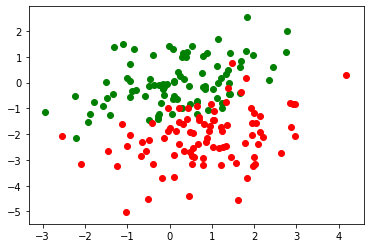

In [30]:
# Code here
X1=np.loadtxt("./svm_c0.txt")
X2=np.loadtxt("./svm_c1.txt")

plt.scatter(X1[:,0],X1[:,1],color='green')
plt.scatter(X2[:,0],X2[:,1],color='red')
plt.show()

X = np.vstack((X1,X2))
Y = np.hstack((-1*np.ones(len(X1)),np.ones(len(X2)))).T

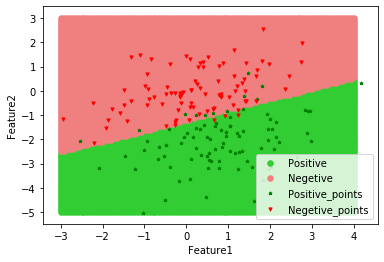

In [31]:
#linear kernel
model = SVC(kernel="linear").fit(X,Y)
plot_decision_boundary(model,[-3,4,-5,3],100)

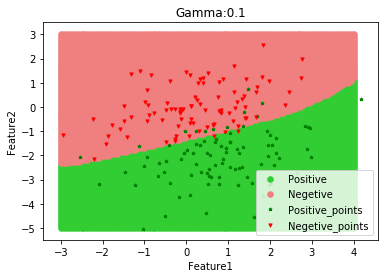

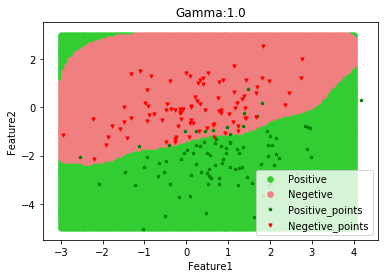

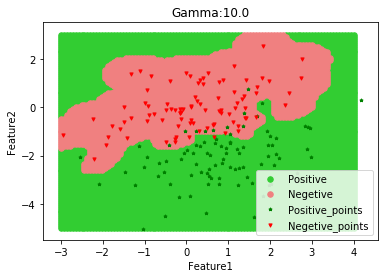

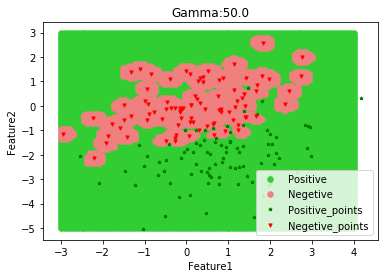

In [32]:
#Gaussian kernel
gamma_list = [0.1,1.0,10.0,50.0]
model = SVC(kernel="rbf",gamma=gamma_list[0]).fit(X,Y)
plt.title("Gamma:{}".format(gamma_list[0]))
plot_decision_boundary(model,[-3,4,-5,3],100)

model = SVC(kernel="rbf",gamma=gamma_list[1]).fit(X,Y)
plt.title("Gamma:{}".format(gamma_list[1]))
plot_decision_boundary(model,[-3,4,-5,3],100)

model = SVC(kernel="rbf",gamma=gamma_list[2]).fit(X,Y)
plt.title("Gamma:{}".format(gamma_list[2]))
plot_decision_boundary(model,[-3,4,-5,3],100)

model = SVC(kernel="rbf",gamma=gamma_list[3]).fit(X,Y)
plt.title("Gamma:{}".format(gamma_list[3]))
plot_decision_boundary(model,[-3,4,-5,3],100)


# Take Home

**Load the Forest Cover Types dataset from sklearn. 1. Use sklearn's SVM function to classify the data. Do hyperparameter tuning using <br><br> a) C = {0.001,0.01,0.1,1,10,100} <br><br> b) kernel = {'linear','poly','rbf','sigmoid'}. For the polynomial kernel, test with degrees 1,2,3,4,5. For the other kernels, test with gamma values of 0.001,0.01,0.1,1,10,100. <br><br> To do the above exercise of hyperparameter tuning, use the cross validation function in sklearn. Do not perform each experiment separately. <br><br> c) Report the accuracies (F1 scores) of the 5 best cases in a tabular form. <br><br>  d) Plot the confusion matrices of the best 5 cases.<br> e) Comment on the significance of each hyperparameter. <br><br> 2. a) Use sklearn's logistic regression, KNN and Naive Bayes to classify the above dataset. Report the F1 scores and confusion matrices in each case. <br> b) Arrange the 4 classifiers (LR, NB, SVM, KNN) in the decreasing order of F1 scores. Comment on which classifier performs best and why.**

In [33]:
from sklearn import datasets

dataset=datasets.fetch_covtype(data_home=None, download_if_missing=True, random_state=None, shuffle=False)


In [41]:
#preprocessing
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Train test split
X_train1, X_test1, y_train, y_test = train_test_split(dataset.data,dataset.target, test_size=0.1, random_state=11)

In [42]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

In [44]:
np.min(X_train,axis=1)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#For linear, sigmoid,rbf
parameters = {'kernel':('linear','sigmoid','rbf'),'gamma':(0.001,0.01,0.1,1,10,100)}
best_model = SVC()
clf = GridSearchCV(best_model, parameters, cv=3,verbose=10)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] gamma=0.001, kernel=linear ......................................


In [ ]:
#for polynomial
parameters = {'degree':(1,2,3,4,5)}
best_model = SVC(kernel='poly')
clf_poly = GridSearchCV(best_model, parameters, cv=3,verbose=1)
clf_poly.fit(X_train,y_train)